# 📊 Statistical Analysis of the COVID-19 Dataset using Python

## 🧭 Objectives:

- Perform continent-wise and country-wise analysis of COVID cases  
- Understand the seasonal pattern of the top affected countries  
- Analyze correlation between different features using Chi-squared contingency test  
- Explore the spread of daily new cases in top countries  

## ✨ Key Features:

- Detailed analysis of country-wise death rates  
- 7-day moving average to smoothen daily new case trends  
- Two-way ANOVA to assess the impact of population and continent on average daily new cases  

## 📌 Description of Features:

- **date** – Date of observation of the row's data in `YYYY-MM-DD` format  
- **country** – Country in which the row's data was observed  
- **cumulative_total_cases** – Cumulative number of confirmed cases as of the row's date, for that country  
- **daily_new_cases** – Daily new confirmed cases on that date, for that country  
- **active_cases** – Number of active cases (not recovered or deceased) on that date, for that country  
- **cumulative_total_deaths** – Cumulative confirmed deaths as of that date, for that country  
- **daily_new_deaths** – Daily new confirmed deaths on that date, for that country  
- **continent** – Continent of the observed country  
- **total_confirmed** – Total confirmed cases in that country  
- **total_deaths** – Total confirmed deaths in that country  
- **total_recovered** – Total recoveries in that country  
- **active_cases** – Number of active cases in the observed country  
- **serious_or_critical** – Estimated number of critical or serious cases in that country  
- **total_cases_per_1m_population** – Total cases per 1 million population in that country  
- **total_deaths_per_1m_population** – Total deaths per 1 million population in that country  
- **total_tests** – Total tests conducted in that country  

---

> 💡 This analysis is performed using real-world data to derive statistical insights and visualize pandemic trends with Python.


In [1]:
# importing essential libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

try:
    import google.colab   # exception handling for importing google colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

# Load dataset based on environment
if IN_COLAB:
    from google.colab import drive 
    drive.mount('/content/drive')
    file_path1 = r"G:\My Drive\worldometer_coronavirus_daily_data.csv"  # Use raw string
    file_path2 = r"G:\My Drive\worldometer_coronavirus_summary_data.csv"
else:
    file_path1 = r"C:\Users\HP\Downloads\Covid_19_global_dataset\worldometer_coronavirus_daily_data.csv"
    file_path2 = r"C:\Users\HP\Downloads\Covid_19_global_dataset\worldometer_coronavirus_summary_data.csv"
daily_df_raw = pd.read_csv(file_path1)
summary_df_raw = pd.read_csv(file_path2)

In [2]:
daily_df_raw.isnull().sum()   # checking the null values 

date                           0
country                        0
cumulative_total_cases         0
daily_new_cases            10458
active_cases               18040
cumulative_total_deaths     6560
daily_new_deaths           26937
dtype: int64

In [3]:
summary_df_raw.isnull().sum()   # checking the null values 

country                            0
continent                          0
total_confirmed                    0
total_deaths                       8
total_recovered                   22
active_cases                      22
serious_or_critical               81
total_cases_per_1m_population      0
total_deaths_per_1m_population     8
total_tests                       14
total_tests_per_1m_population     14
population                         0
dtype: int64

In [4]:
merge_df = daily_df_raw.merge(summary_df_raw, on = 'country', how = 'left')  # merging both the datasets
merge_df



,date,country,cumulative_total_cases,daily_new_cases,active_cases_x,cumulative_total_deaths,daily_new_deaths,continent,total_confirmed,total_deaths,total_recovered,active_cases_y,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,2020-2-15,Afghanistan,0.0,NaN,0.0,0.0,NaN,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636
1,2020-2-16,Afghanistan,0.0,NaN,0.0,0.0,NaN,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636
2,2020-2-17,Afghanistan,0.0,NaN,0.0,0.0,NaN,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636
3,2020-2-18,Afghanistan,0.0,NaN,0.0,0.0,NaN,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636
4,2020-2-19,Afghanistan,0.0,NaN,0.0,0.0,NaN,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184782,2022-5-10,Zimbabwe,248642.0,106.0,963.0,5481.0,2.0,Africa,249206,5482.0,242417.0,1307.0,12.0,16324,359.0,2287793.0,149863.0,15265849
184783,2022-5-11,Zimbabwe,248778.0,136.0,1039.0,5481.0,0.0,Africa,249206,5482.0,242417.0,1307.0,12.0,16324,359.0,2287793.0,149863.0,15265849
184784,2022-5-12,Zimbabwe,248943.0,165.0,1158.0,5481.0,0.0,Africa,249206,5482.0,242417.0,1307.0,12.0,16324,359.0,2287793.0,149863.0,15265849
184785,2022-5-13,Zimbabwe,249131.0,188.0,1283.0,5482.0,1.0,Africa,249206,5482.0,242417.0,1307.0,12.0,16324,359.0,2287793.0,149863.0,15265849


In [5]:
merge_df.info()  # checking the data types of different columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184787 entries, 0 to 184786
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   date                            184787 non-null  object 
 1   country                         184787 non-null  object 
 2   cumulative_total_cases          184787 non-null  float64
 3   daily_new_cases                 174329 non-null  float64
 4   active_cases_x                  166747 non-null  float64
 5   cumulative_total_deaths         178227 non-null  float64
 6   daily_new_deaths                157850 non-null  float64
 7   continent                       184787 non-null  object 
 8   total_confirmed                 184787 non-null  int64  
 9   total_deaths                    178227 non-null  float64
 10  total_recovered                 166747 non-null  float64
 11  active_cases_y                  166747 non-null  float64
 12  serious_or_criti

In [6]:
merge_df.isnull().sum()  # null value sum for each column

date                                  0
country                               0
cumulative_total_cases                0
daily_new_cases                   10458
active_cases_x                    18040
cumulative_total_deaths            6560
daily_new_deaths                  26937
continent                             0
total_confirmed                       0
total_deaths                       6560
total_recovered                   18040
active_cases_y                    18040
serious_or_critical               66420
total_cases_per_1m_population         0
total_deaths_per_1m_population     6560
total_tests                       11480
total_tests_per_1m_population     11480
population                            0
dtype: int64

In [7]:
for feature in merge_df.columns:
    if merge_df[feature].isnull().sum() >= 1:   # getting the percentage of missing values for each column
        print("There are {}% of missing values in the column '{}'\n".format(np.round((merge_df[feature].isnull().sum()/len(merge_df)) * 100, 4), feature))

There are 5.6595% of missing values in the column 'daily_new_cases'

There are 9.7626% of missing values in the column 'active_cases_x'

There are 3.55% of missing values in the column 'cumulative_total_deaths'

There are 14.5773% of missing values in the column 'daily_new_deaths'

There are 3.55% of missing values in the column 'total_deaths'

There are 9.7626% of missing values in the column 'total_recovered'

There are 9.7626% of missing values in the column 'active_cases_y'

There are 35.9441% of missing values in the column 'serious_or_critical'

There are 3.55% of missing values in the column 'total_deaths_per_1m_population'

There are 6.2126% of missing values in the column 'total_tests'

There are 6.2126% of missing values in the column 'total_tests_per_1m_population'



In [8]:
pd.set_option('display.float_format', '{:.0f}'.format)  # setting the format for the higher value in the data frame

In [9]:
latest_cases = merge_df.sort_values('date').groupby('country').tail(1)  # capturing the recent date for each country by sorting the dates in ascending order and then using groupby to sort these dates for each country while capturing the recent date as well using tail(1)

# Top 10 countries with highest total cases
top_countries = latest_cases.sort_values('cumulative_total_cases', ascending=False).head(10)
top_countries 


,date,country,cumulative_total_cases,daily_new_cases,active_cases_x,cumulative_total_deaths,daily_new_deaths,continent,total_confirmed,total_deaths,total_recovered,active_cases_y,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
177406,2022-5-14,USA,84209473,26740,1938567,1026646,55,North America,84209473,1026646,81244260,1938567,1941,251659,3068,1016882505,3038939,334617623
77923,2022-5-14,India,43121599,2487,17692,524214,13,Asia,43121599,524214,42579693,17692,698,30686,373,843836914,600479,1405273033
22139,2022-5-14,Brazil,30682094,17355,298772,664920,90,South America,30682094,664920,29718402,298772,8318,142460,3087,63776166,296119,215373503
59883,2022-5-14,France,29160802,30459,856871,147257,0,Europe,29160802,147257,28156674,856871,1329,444914,2247,271490188,4142201,65542502
64803,2022-5-14,Germany,25774509,40929,1711202,137907,98,Europe,25780226,137919,23956700,1685607,1279,305877,1636,122332384,1451450,84282880
174126,2022-5-14,UK,22159805,0,325327,176708,0,Europe,22159805,176708,21677896,305201,253,323264,2578,519264096,7574950,68550166
135586,2022-5-14,Russia,18255337,5047,236787,377571,107,Europe,18260293,377670,17647179,235444,2300,125027,2586,273400000,1871949,146050996
155266,2022-5-14,South Korea,17756627,29541,NaN,23661,55,Asia,17782061,23709,NaN,NaN,338,346282,462,15804065,307763,51351355
83663,2022-5-14,Italy,17030711,36606,1001352,165182,91,Europe,17057873,165244,15894511,998118,347,282901,2741,217853667,3613054,60296265
171666,2022-5-14,Turkey,15053168,1407,3040,98890,5,Asia,15053168,98890,14951238,3040,975,174977,1149,160622710,1867071,86029250


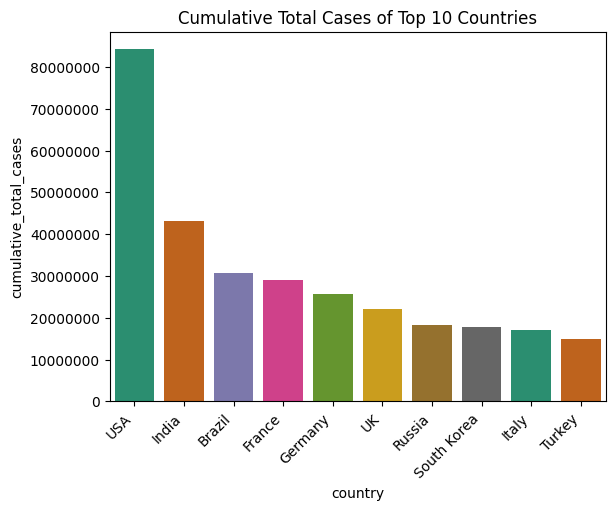

In [10]:
sns.barplot(x = top_countries['country'],y =  top_countries['cumulative_total_cases'], hue = top_countries['country'], legend = False, palette = 'Dark2')  # creating a bar plot of the top countries' cumulative total cases
plt.xticks(rotation = 45, ha = 'right')
plt.title('Cumulative Total Cases of Top 10 Countries')
plt.ticklabel_format(style='plain', axis='y')
plt.show()


### As it can be seen in the above barplot, the countries with highest cumulative cases are India and the USA. One of the shocking fact is that how severely the USA was affected by the virus.

In [11]:
merge_df['death_rate'] = (merge_df['cumulative_total_deaths'] / merge_df['cumulative_total_cases'])* 100  # capturing the death rate 

# The captured death rate will show the percentage of people who died, out of the total number of affected people up to a given date.

In [12]:
usa_df = merge_df[merge_df['country'] == 'USA']  # statistical summary based on USA's information
usa_df.describe()

,cumulative_total_cases,daily_new_cases,active_cases_x,cumulative_total_deaths,daily_new_deaths,total_confirmed,total_deaths,total_recovered,active_cases_y,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,death_rate
count,820,819,820,820,815,820,820,820,820,820,820,820,820,820,820,820
mean,31613650,102820,3256485,502390,1260,84209473,1026646,81244260,1938567,1941,251659,3068,1016882505,3038939,334617623,2
std,26159518,135074,3399781,320185,901,0,0,0,0,0,0,0,0,0,0,1
min,15,0,10,0,0,84209473,1026646,81244260,1938567,1941,251659,3068,1016882505,3038939,334617623,0
25%,6667717,33102,1192466,197522,589,84209473,1026646,81244260,1938567,1941,251659,3068,1016882505,3038939,334617623,2
50%,31359994,61092,2243084,573069,1022,84209473,1026646,81244260,1938567,1941,251659,3068,1016882505,3038939,334617623,2
75%,46594452,119769,4198612,765107,1742,84209473,1026646,81244260,1938567,1941,251659,3068,1016882505,3038939,334617623,3
max,84209473,909610,17935434,1026646,4352,84209473,1026646,81244260,1938567,1941,251659,3068,1016882505,3038939,334617623,7


## The above data frame of statistical analysis of USA gives the following  key insights:

- ### About 25% of the USA population was affected by covid-19.

- ### On average 61092 number of daily new cases were recorded.

- ### 1 million people died in the USA because of this deadly virus.

In [13]:
india_df = merge_df[merge_df['country'] == 'India']  # statistical summary based on India's information

india_df.describe()


,cumulative_total_cases,daily_new_cases,active_cases_x,cumulative_total_deaths,daily_new_deaths,total_confirmed,total_deaths,total_recovered,active_cases_y,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,death_rate
count,820,819,820,820,815,820,820,820,820,820,820,820,820,820,820,820
mean,19374604,52652,514605,256603,643,43121599,524214,42579693,17692,698,30686,373,843836914,600479,1405273033,2
std,15687471,80628,724321,197158,930,0,0,0,0,0,0,0,0,0,0,1
min,3,0,0,0,0,43121599,524214,42579693,17692,698,30686,373,843836914,600479,1405273033,0
25%,4258828,8308,97596,74200,140,43121599,524214,42579693,17692,698,30686,373,843836914,600479,1405273033,1
50%,12184578,24437,275716,166402,374,43121599,524214,42579693,17692,698,30686,373,843836914,600479,1405273033,1
75%,34146524,54276,591722,460239,705,43121599,524214,42579693,17692,698,30686,373,843836914,600479,1405273033,2
max,43121599,414433,3741179,524214,5093,43121599,524214,42579693,17692,698,30686,373,843836914,600479,1405273033,4


## The above data frame of statistical analysis of India gives the following  key insights:
- ### The average daily new cases were found to be 24437, which are far lower than the USA's average daily new cases.

- ### 374 number of daily new deaths were recorded as an average.

- ### The highest number of active cases ever recorded in India was 3741179.

- ### 524214 people died due to corona virus.


In [14]:
merge_df['7_day_avg'] = merge_df.groupby('country')['daily_new_cases'].transform(lambda x : x.rolling(7).mean())
# Transforming the country's daily new case values into the mean of these values by using 7-day rolling period and storing it into a new column.

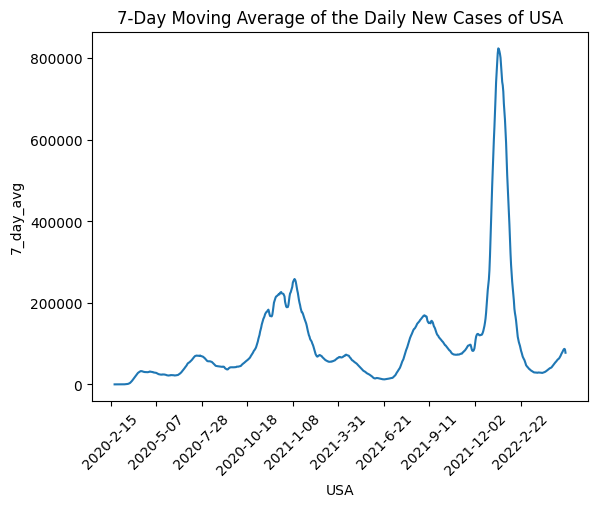

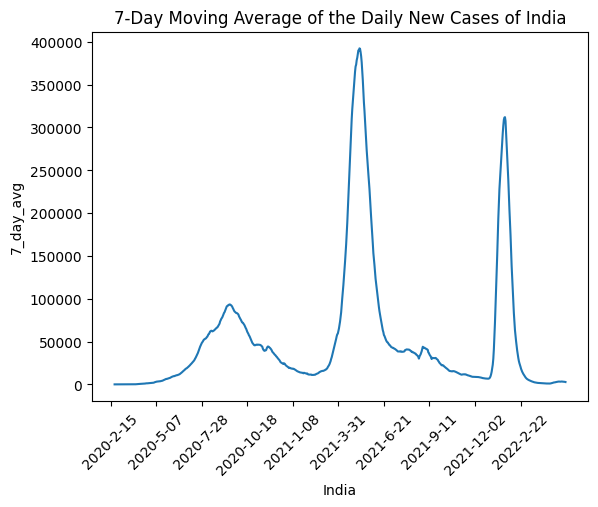

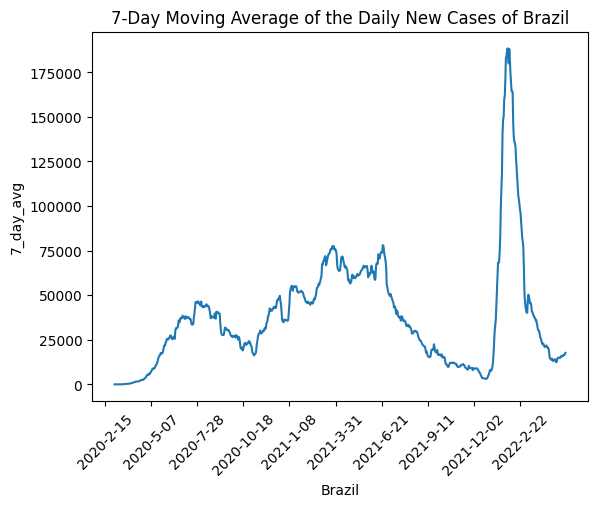

In [15]:
for country in ['USA', 'India', 'Brazil']:    # Selecting top 3 countries

    country_df = merge_df[merge_df['country'] == country] 
    dates = country_df['date'].unique()  # selecting the unique dates

    step_size = len(dates) // 10  # getting 10 dates
    plt.plot(country_df['date'],country_df['7_day_avg'])  # plotting the line plot of country's date and country's 7-day-avg
    plt.xlabel(country)
    plt.ylabel('7_day_avg')
    plt.title("7-Day Moving Average of the Daily New Cases of {}".format(country))

    plt.xticks(dates[::step_size],rotation = 45)  # selecting the step size on the basis of unique dates

    plt.show()
    

## Observations from the above plots:

- ### Daily cases in Brazil increased faster as compared to rest of the countries. They increased again after a sudden decline at the end of 2021.

- ### As it can be observed, all these countries have experienced a spike in February 2022, which is quite shocking.

- ### India has experienced a sharp peak in daily cases in March 2021.

In [16]:
from scipy.stats import chi2_contingency 

merge_df['death_rate_level'] = pd.qcut(merge_df['death_rate'], 2, labels = ['Low', 'HIgh'])  # based on the 50-50% ranking of the quantile ranking, pd.cut will label those death rate into Low to High
# creating a new column of 'death_rate_level'

contingency_table = pd.crosstab(merge_df['continent'], merge_df['death_rate_level'])  # creating a contingency table of continent-wise death rate level

chi2, p, dof, expected_freq = chi2_contingency(contingency_table)  # Performing chi2 test of independence to check whether the continent affects the death rate level
print('Chi Square Statistics: {}'.format(chi2))
print('p_value: {}'.format(p))
print("Degree Of Freedom: {}".format(dof))

print('Expected Frequency: {}'.format(expected_freq))


Chi Square Statistics: 10889.466925854817
p_value: 0.0
Degree Of Freedom: 5
Expected Frequency: [[22467.13173649 22466.86826351]
 [19339.61339822 19339.38660178]
 [ 3854.52260107  3854.47739893]
 [18960.61117594 18960.38882406]
 [15456.59063004 15456.40936996]
 [ 5194.53045824  5194.46954176]]


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


## Results:

- ### Since the p-value is less than 0.05 of the above Chi-Square test, this indicates a strong relationship between death rate and continent, which means that the continent affects death rate level.

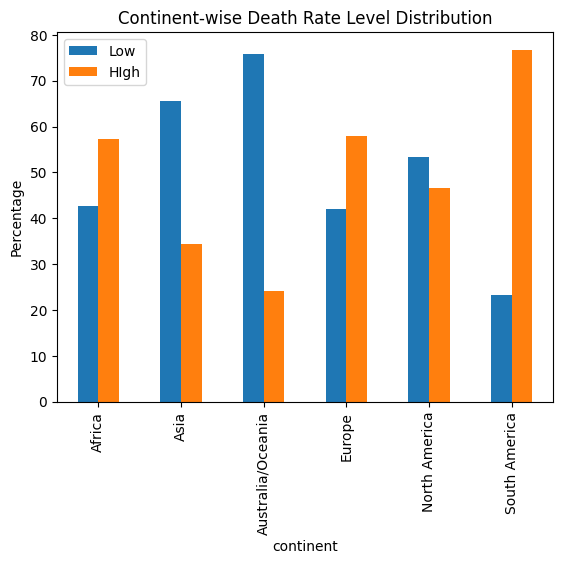

In [17]:
contingency_percentage = contingency_table.div(contingency_table.sum(axis=1), axis = 0) * 100  # finding the percentage of the High and Low value

contingency_percentage.plot(kind = 'bar')  # plotting them in the bar for each country
plt.legend(loc = 'upper left')  # placing the legend on the upper left
plt.title('Continent-wise Death Rate Level Distribution')
plt.ylabel('Percentage')
plt.show()

## Observations:

- ### It is clearly observed from the bar plot that the countries in South America have experienced higher death rates, with Brazil being one of the top countries affected.

- ### Australia has experienced far fewer deaths.

In [18]:
usa_df.loc[:, 'date'] # checking the order of dates 

176587    2020-2-15
176588    2020-2-16
176589    2020-2-17
176590    2020-2-18
176591    2020-2-19
            ...    
177402    2022-5-10
177403    2022-5-11
177404    2022-5-12
177405    2022-5-13
177406    2022-5-14
Name: date, Length: 820, dtype: object

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


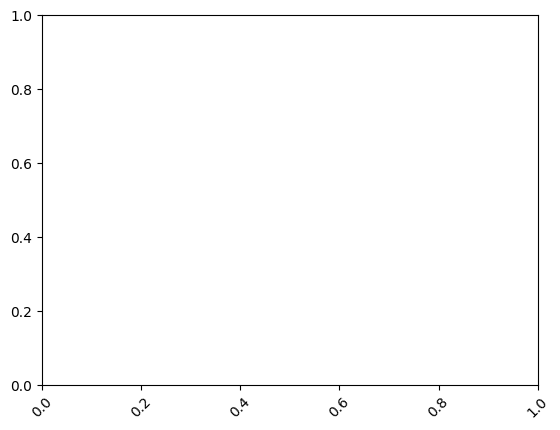

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

"""seasonal_decompose will check the date-wise seasonality of daily_new_cases by the period
of 7 which will give the trend of daily new cases on the basis of week. This will give an
understanding to identify whether there is a weekly pattern of cases"""

usa_df.loc[:,'date'] = pd.to_datetime(usa_df['date'])  # converting 'date' into date time var
usa_df.set_index('date', inplace = True)  # setting the 'date' variable as an index

result = seasonal_decompose(usa_df['daily_new_cases'].dropna(), model='additive', period=7)
plt.xticks(rotation = 45)

"""model = 'additive' means that there is an assumption that 'trend', 'seasonality' and 'errors' are being added up to give the final value.
For example if the number of cases in a certain day are 500, then these were formed by adding 300 of trend, 150 of seasonal and 50 of errors."""

plt.show()

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


<Figure size 1400x1500 with 0 Axes>

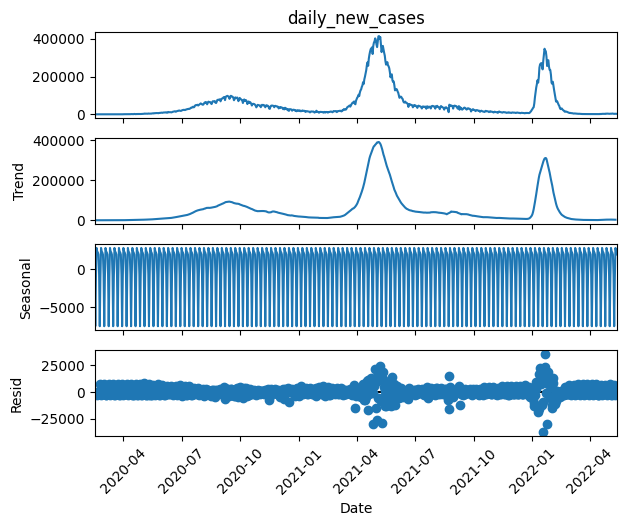

In [20]:
india_df.loc[:,'date'] = pd.to_datetime(india_df['date'])
india_df.set_index('date', inplace = True) 

result2 = seasonal_decompose(india_df['daily_new_cases'].dropna(), model='additive', period=7)
plt.figure(figsize=(14, 15))
result2.plot() 
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.show() # The output will show a trend graph of 7-day-moving average, a weekly trend graph and a residual graph

### The above seasonal graphs of 'daily_new_cases' shows some key observations:
- ### The Trend graph shows three distinct waves of coronavirus in the India:

   - #### The first wave occurred after mid-2020,
   - #### the second wave around the mid-2021, 
   - #### and the third wave in early 2022.

 - ### The Trend graph shows three distinct waves of coronavirus in the USA:
   - #### The first wave occurred at the end of 2020,
   - #### the second wave occurred after mid-2021, 
   - #### and the third wave in early 2022.

-
 ### Observations from the Seasonal components of in the graph for both the countries are as follows:
 
 - ### The graph shows exact same pattern at every 7 days, this clearly indicates a weekly cycle of testing and reporting of COVID cases.


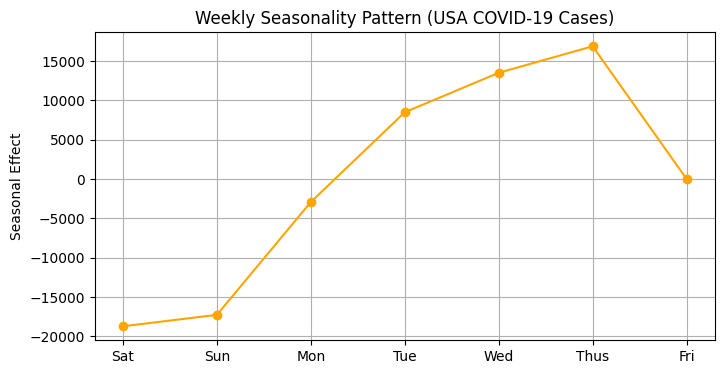

In [21]:
# taking the initial seasonal value
seasonal_values = result.seasonal[:7].values

# Weekday labels, assuming starts from Thursday
weekdays = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thus', 'Fri']  # these weekdays are following this order because, the starting date of COVID's daily new cases listed in the dataset is 2020-2-15 for both India and the USA 

plt.figure(figsize=(8, 4))
plt.plot(weekdays, seasonal_values, marker='o', linestyle='-', color='orange')
plt.title('Weekly Seasonality Pattern (USA COVID-19 Cases)')
plt.ylabel('Seasonal Effect')
plt.grid(True)
plt.show()


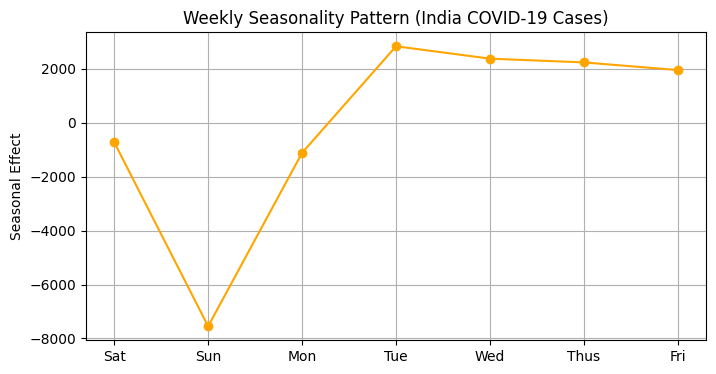

In [22]:
# taking the initial values of the season
seasonal_values2 = result2.seasonal[:7].values

plt.figure(figsize=(8, 4))
plt.plot(weekdays, seasonal_values2, marker='o', linestyle='-', color='orange')
plt.title('Weekly Seasonality Pattern (India COVID-19 Cases)')
plt.ylabel('Seasonal Effect')
plt.grid(True)
plt.show()


## Observations from the above seasonality pattern graphs:

- ### Cases were reported more on every Tuesday, Wednesday and Thursday as compared to other weekdays for both India and the USA, which suggest that meter readings were performed on these specific days. This can be because of the backlog clearance on these days or system delays for reporting the COVID cases. These observations can be discussed with domain expert to figure out the exact reason.


In [23]:
# This Two-way Anova test will check if the continent and population affect the daily new cases
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('daily_new_cases ~ C(continent) + population', data=merge_df).fit() # categorical + numerical will create a combination of linear model and Anova test
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table) 

                     sum_sq     df    F  PR(>F)
C(continent)   644587396831      5  433       0
population    2734504065267      1 9183       0
Residual     51906745080114 174322  NaN     NaN


## Results:
- ### Since the PR(>F) is 0 for both - continent and population, this means that the average of COVID daily new cases is significantly different across continents, and the population also affects the daily new cases which indicates that if population increases then, the average daily new cases also increase.